# 'Natural Experiments in Management Research'

__Author__: masked

__Synopsis__: this Jupyter notebook reproduces the set of exhibits
              reported in the 2023 JoM review issue proposal
              # __!! report number !!__

__Updated__: June 24, 2021

## Load functions

In [17]:
# utilities
from pprint import pprint
from IPython.core.display import display, HTML
# standard stuff
import pandas as pd
# a user defined lollipop chart
from companionCode.charts import lollipop, line_chart
# to parse BibTeX stuff
from companionCode.handleBibs import df_from_bib
# data transformation tasks
from companionCode.nlp.dataTransformation import spacy_pipeline, extract_ngrams, tp_corpus
# topic modeling
from companionCode.nlp.topicModeling import search_k, tm_estimation, get_vectors, lda_viz

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sampling

In [2]:
# TODO: export separate BibTeX files from the individual folders

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


## Sample descriptives

### Load BibTeX data

In [3]:
in_f = "manuscript/references/sampled_studies.bib"
df = df_from_bib(in_f)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Distribution of studies over time

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


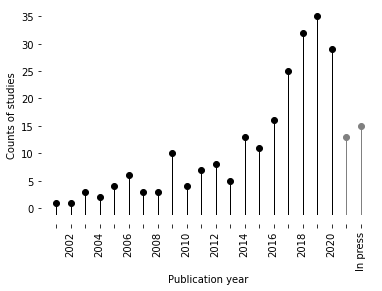

In [4]:
lollipop(
    df_=df,
    x_label="Publication year",
    y_label="Counts of studies", 
    grouping_var="year"
)

### Distribution of studies over time and journals

In [5]:
# cross-tab
tw = pd.crosstab(df['journal'], df['year'])
# write file & display
out_f = 'manuscript/exhibits/articles_over_time_and_journals.html'
tw.to_html(out_f)
display(HTML(out_f))

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


year,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
journal,,,,,,,,,,,,,,,,,,,,,,
Academy of Management Journal,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,2,0,0,0,0
Administrative Science Quarterly,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0
Entrepreneurship: Theory and Practice,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,1,0,0,0,1,0,0
Journal of Business Ethics,0,0,0,1,0,0,0,0,0,0,1,0,0,0,2,2,2,5,2,3,1,0
Journal of Business Venturing,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,1,3,0
Journal of Management,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0
Journal of Management Studies,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,2,1,0,0,0
Leadership Quarterly,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
Management Science,1,1,1,0,0,2,1,2,3,1,2,4,1,4,3,10,9,12,13,14,2,11


## Topic modeling of abstracts

### Read abstracts

In [6]:
df = pd.read_csv('~/.data/academy_of_management_journal.csv')
df.info()

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 34 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Authors                        1600 non-null   object 
 1   Author(s) ID                   1600 non-null   object 
 2   Title                          1600 non-null   object 
 3   Year                           1600 non-null   int64  
 4   Source title                   1600 non-null   object 
 5   Volume                         1600 non-null   int64  
 6   Issue                          1600 non-null   int64  
 7   Art. No.                       0 non-null      float64
 8   Page start                     1600 non-null   object 
 9   Page end                       1586 non-null   float64
 10  Page count                     0 non-null      float64
 11  Cited by                       1577 non-null   float64
 12  DOI                            1587 non-null   o

### Text pre-processing

In [7]:
tkn_docs = spacy_pipeline(
    model_='en_core_web_lg',
    raw_corpus=df.loc[:, 'Abstract'].to_list()
)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Extract ngrams

In [8]:
tkn_docs = extract_ngrams(tkn_docs=tkn_docs)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Create corpus to pass to Tomotopy for topic modeling

In [9]:
corpus = tp_corpus(tkn_docs)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Search for an adequate number of topics

In [10]:
cs = search_k(min_=1, max_=30, delta_=1, corpus_=corpus)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


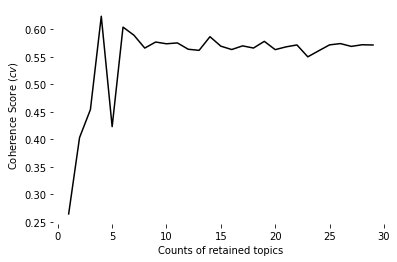

In [11]:
line_chart(
    x_=cs.keys(),
    y_=cs.values(),
    x_label='Counts of retained topics',
    y_label='Coherence Score ($cv$)'
)

### Preview the results of the best model

In [12]:
# estimate model with desired number of topics
lda_fit = tm_estimation(corpus_=corpus, k_=6)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Num docs:1600, Num Vocabs:2173, Total Words:85681
Removed Top words:  firm performance study effect team relationship theory academy_management_journal organizational work organization research find employee high examine result level social influence
Iteration: 0000, LL per word: -9.55
Iteration: 0020, LL per word: -7.659
Iteration: 0040, LL per word: -7.471
Iteration: 0060, LL per word: -7.414
Iteration: 0080, LL per word: -7.38
Iteration: 0100, LL per word: -7.355
Iteration: 0120, LL per word: -7.348
Iteration: 0140, LL per word: -7.339
Iteration: 0160, LL per word: -7.324
Iteration: 0180, LL per word: -7.324
Iteration: 0200, LL per word: -7.318
Iteration: 0220, LL per word: -7.318
Iteration: 0240, LL per word: -7.315
Iteration: 0260, LL per word: -7.306
Iteration: 0280, LL per word: -7.302
Iteration: 0300, LL per word: -7.312
Iteration: 0320, LL per word: -7.307
Iteration: 0340, LL per word: -7.309
Iteration: 0360, LL per word: -7.299
Iteration: 0380, LL per word: -7.3
Iteration: 04

### Get estimates

In [15]:
topic_2_term, topic_2_doc, doc_lengths, vocab, term_frequency = get_vectors(lda_fit)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### Visualization

In [ ]:
lda_viz(
    topic_2_term=topic_2_term,
    topic_2_doc=topic_2_doc,
    doc_lengths=doc_lengths,
    vocab_=vocab,
    term_frequency=term_frequency
)

/home/simone/py3Venvs/nlp/lib/python3.9/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
